## Using accept-reject and a standard normal proposal, obtain samples from a truncated standard normal distribution with pdf:
                
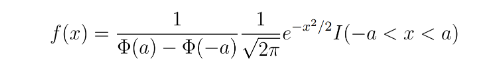
where Φ(·) is the CDF of a standard normal distribution. Run for a=4 and a=1. 
What are the differences between the two settings?


In [1]:
using LinearAlgebra

In [2]:
using Plots
using Statistics
using Distributions

In [3]:
using Random

Random.seed!(42)

TaskLocalRNG()

In [4]:
function Standard_Normal(x)
    return exp((-(x^2)/2))/(2*pi)^0.5
end    

Standard_Normal (generic function with 1 method)

In [5]:
# Target distribution range is (-a,a) ; else constant c will be zero.......
function RV_generator(a)
    
#     a = 1
#     # Writing ratio = sup(f(x)/g(x))
#  ratio = 1/(Standard_Normal(a)- Standard_Normal(-a))
    count =0 
    accept  = 0
    array =[]
    while(accept==0)
        count +=1
        d=Normal()
        N= rand(d)
        if (N>-a && N<a) 
            accept =1
            push!(array,N)
            push!(array,count)
            return array
        end
    end    
 end         

RV_generator (generic function with 1 method)

In [6]:
function find(a)
    Sample_size  = 1e3
    Sample_array = []
    result =[]
    Count = []
    for  i in 1:Sample_size
            result = RV_generator(a)
            push!(Sample_array,result[1])
            push!(Count,result[2])
             
    end  
# println(Sample_array)
   
    ratio = 1/(Standard_Normal(a)- Standard_Normal(-a))
    println("The expected numner of iterations(\'c\'): ",ratio)
    println("The average number of count it take to accept comes out to be: " ,Statistics.mean(Count))
    println("\n")
    X = TruncatedNormal(0, 1, -a, a)
    println("Mean of Samples comes out to be : ", Statistics.mean(Sample_array))
    println("Actual Mean: ",Statistics.mean(X) )
    
    println("\n")
    println("Variance of Samples comes out to be : ", Statistics.var(Sample_array))
    println("Actual variance: ",Statistics.var(X))
#     return Sample_array
end    


find (generic function with 1 method)

In [7]:
find(1)


The expected numner of iterations('c'): Inf
The average number of count it take to accept comes out to be: 1.462


Mean of Samples comes out to be : -0.018582482232208156
Actual Mean: 0.0


Variance of Samples comes out to be : 0.3042514590754055
Actual variance: 0.29112509477279314


In [8]:
find(4)

The expected numner of iterations('c'): Inf
The average number of count it take to accept comes out to be: 1.0


Mean of Samples comes out to be : 0.04968574455973939
Actual Mean: 0.0


Variance of Samples comes out to be : 1.0435158861445222
Actual variance: 0.9989292903724738


## Sample uniformly from a p-dimensional sphere (a circle is p=2). Consider a p-vector x = (x1, x2, ... , xp) and let  .  denote the Euclidean norm. The pdf of this distribution is:
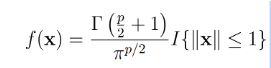
Use a uniform p-dimensional hypercube to sample uniformly from this sphere. Implement this for p = 2, 3, 4, 5, and 6. 
What happens as p increases?


### For p= odd , Use this fromula  to calculate the Gamma Function;
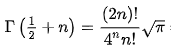
### For p= even , Use this fromula  to calculate the Gamma Function;


In [9]:
function calculate_fx(p)
    p = Int64(p)
    if(p%2==0)
        return factorial(Int64(p/2))/pi^(p/2)
    else
        n = (p+1)/2
        n = Int64(n)
        return (factorial(Int64(2*n))*pi^0.5)/(((4^n)*factorial(n))*pi^(p/2))
    end
end    

calculate_fx (generic function with 1 method)

In [10]:
function RV_Generator(p)

  
    accept =0
    count = 0
    array_p_dim = []
    
    while(accept==0)
        
        count = count +1
#         array_p_dim = []
        sum = 0.0
        for i in 1:p
            U = rand()
            U = 2*U -1 # Sampling from (-1,1)
            push!(array_p_dim,U)
            sum = sum + U^2   
        end
        if (sum <1.0)
            accept =1
            return array_p_dim,count
        else 
            empty!(array_p_dim)    

            
        end        
    end
end    
        

RV_Generator (generic function with 1 method)

In [11]:
## Comparing the Average Count..........
function compare(p,Count_Array)
    g=1/2^p
    f = calculate_fx(p)

    ratio = f/g
    println("For a p = ",p)
    println("The expected numner of counts(\'c\'): ",ratio)
    println("The average number of count it take to accept comes out to be: " ,Statistics.mean(Count_Array))
    println("\n")
end   

compare (generic function with 1 method)

In [12]:
function sphere_distribution(p)
    Samples =10000
    Matrix = zeros(Samples,p)
    Count_Array =[]
    for i in 1:Samples
            Matrix[i,:],count= RV_Generator(p)
            push!(Count_Array,count)
    end 
    return Count_Array,Matrix
end

for p in 2:6
    Array,Matrix = sphere_distribution(p)
    compare(p,Array)
end    
    

For a p = 2
The expected numner of counts('c'): 1.2732395447351628
The average number of count it take to accept comes out to be: 1.2633


For a p = 3
The expected numner of counts('c'): 1.909859317102744
The average number of count it take to accept comes out to be: 1.9063


For a p = 4
The expected numner of counts('c'): 3.242277876554809
The average number of count it take to accept comes out to be: 3.2033


For a p = 5
The expected numner of counts('c'): 6.0792710185402665
The average number of count it take to accept comes out to be: 6.1231


For a p = 6
The expected numner of counts('c'): 12.384589222348605
The average number of count it take to accept comes out to be: 12.3875




### Clearly from above observations, one can say that as  p increases , number of iterations to accept a proposal increases or in other words , the probability of accepting a given random variable from proposal ditribution decreases

In [13]:
# Plotting 
function Visual(p)
    Array, Matrix = sphere_distribution(p)
    A=[2,3,4]
    x=[]
    y=[]
    if (p==2)
#         x =[]
#         y= []
        for i in 1:10000
            push!(x,Matrix[i,1])
            push!(y,Matrix[i,2])   
        end
        
        
        

        scatter(x,y,size(400,400),mode = "markers",title="p=2")

    
    elseif (p==3)
        x =[]
        y= []
        z=[]
        for i in 1:10000
            push!(x,Matrix[i ,1])
            push!(y,Matrix[i ,2])
            push!(z,Matrix[i ,3])      
        end
      
        plot(scatter(x,y,z,size=(400,400),title="p=3"))
        
    end  
         
end    

# for i in 2:3
#     Visual(i)
# end    

Visual (generic function with 1 method)

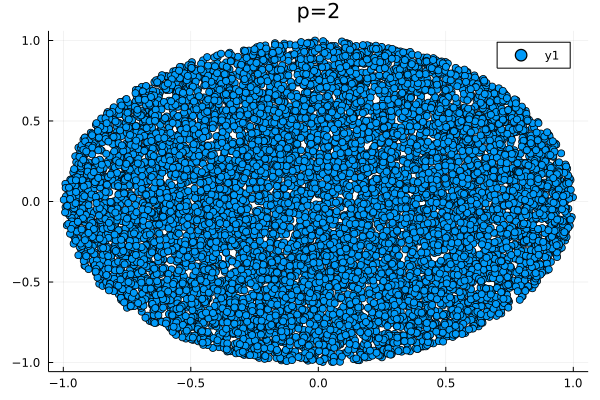

In [14]:
Visual(2)

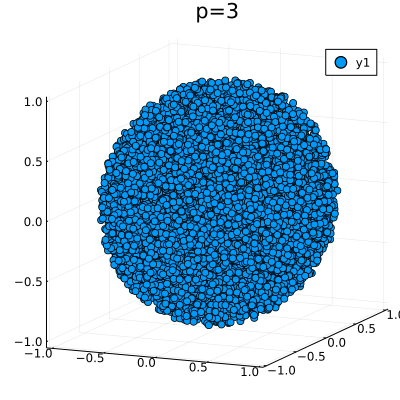

In [15]:
Visual(3)

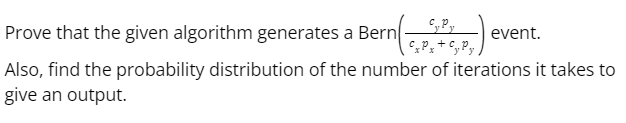
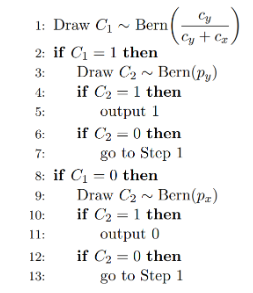

### Let X is the Random Variable generated from above algorithm.
**Clearly, X can take either 0 or 1 value.

<p> The Possible Cases when X= 1:</p> 
<ul>
    <li> <b> C1 =1 and C2=1</b> </li>
    <li> <b> C1 =1 and C2= 0 </b></li>
    <li> <b> C1 =0and C2=0 </b> </li>
    
</ul>
<b> Let take the Probability of X=1 as P</b><p> </p>

 THEN:            $$ P(X=1) =P = \frac{CyPy}{Cy+Cx} + \frac{Cy(1-Py)P}{Cy+Cx} + \frac{Cx(1-Px)P}{Cy+Cx} $$
 <p> </p>
                     $$  P\frac{CyPy+CxPx}{Cy+Cx}=\frac{CyPy}{Cy+Cx} $$
  <p> </p>                   
                       $$ P = \frac{CyPy}{CyPy+CxPx} $$
                       
  #### Hence proved.
##### Now,we know it is the geometric distribution which tells the number of failure before getting a  success, so to calculate this probability distribution , lets first evaluate the probabiltity of acceptance  in one iteration 

  <p>        <b> P(acceptance)  =  P(C1=1)P(C2=1) + P(C1=0)P(C2=1)   (By the law of total Probability)</b> </p>   
              <p> </p>               
                              =  $$\frac{CyPy}{Cy+Cx} +  \frac{CxPx}{Cy+Cx}$$ 

#### ProbabilityDistribution = Geometric(p)
   <p>    where  p = $$\frac{CyPy}{Cy+Cx} +  \frac{CxPx}{Cy+Cx}$$ 

#### Number of iterations comes out to be : $$ \frac{Cx+Cy}{CyPy+CxPx} $$
